In [215]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Dataset')

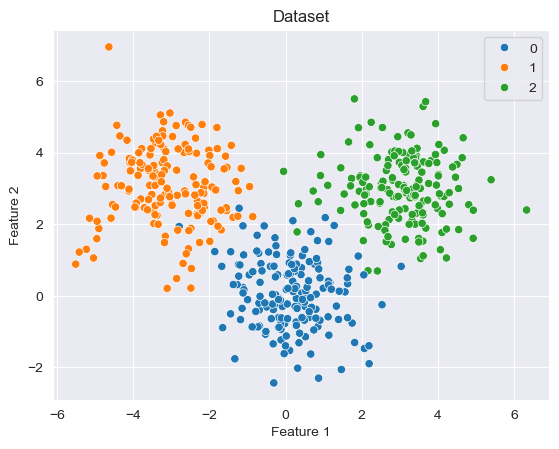

In [216]:
# Generate data
X, y_true = make_blobs(n_samples=500,
                  centers=[[0,0], [-3, 3],[3,3]],
                  cluster_std=1,
                  random_state=1)

# transform to dataframe
blobs_df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])


# plot the data
sns.scatterplot(blobs_df,
                x='Feature 1',
                y='Feature 2',
                hue=y_true,
                palette='tab10').set_title('Dataset')


In [217]:
# set number of cluster
NUM_CLUSTER = 3
COLOR_LIST = ['blue', 'orange', 'green']

cluster_id = np.arange(NUM_CLUSTER)

## Option 1 : Random initializtion

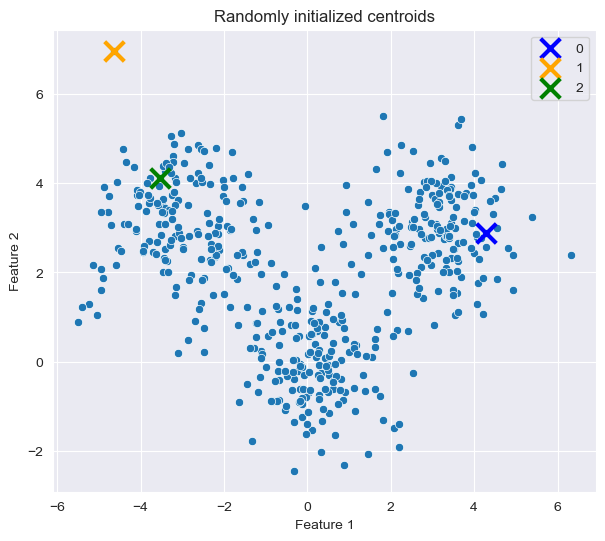

In [218]:
# random initialization
data_point_idx = np.arange(X.shape[0])
random_idx = np.random.choice(data_point_idx,size=3, replace=False)
center_idx = X[random_idx]

# plot the data
plt.figure(figsize=(7,6))
sns.scatterplot(blobs_df,
                x='Feature 1',
                y='Feature 2')
for center_ids, center in enumerate(center_idx):
    plt.scatter(x=center[0],
                y=center[1],
                s=200,
                linewidths=3,
                c=COLOR_LIST[center_ids],
                label=center_ids,
                marker='x')
plt.title('Randomly initialized centroids')
plt.legend()
plt.show()

### K++ initialization

In [219]:
# list containing initial cluster centers
center_list = []

# select first center
random_idx = np.random.choice(data_point_idx, size=1)[0]
center_list.append(X[random_idx])

# calculate the distance matrix from the center
distance = np.linalg.norm(X - center_list[0], axis = 1)
distance_mtx = np.expand_dims(distance, axis = 1)

# mark the first iteration
next_center = 1

In [ ]:
# generate center points
while len(center_list) < NUM_CLUSTER:
    # for each point, find the distance of the closest point to center
    closest_dist = np.min(distance_mtx, axis=1)

    # calculate the probability of the nearest distance
    selection_prob = closest_dist/ closest_dist.sum()

    # select the center based on the probability
    random_idx = np.random.choice(data_point_idx,
                                  p=selection_prob)
    center_list.append(X[random_idx])
    next_center += 1

    distance = np.linalg.norm(X - X[random_idx], axis=1)
    distance_mtx = np.column_stack([distance_mtx, distance])

cluster_centers = np.array(center_list)

In [221]:
cluster_centers

array([[ 3.03085711,  0.82458463],
       [-3.93391466,  2.46697967],
       [ 3.31223869,  2.80667836]])

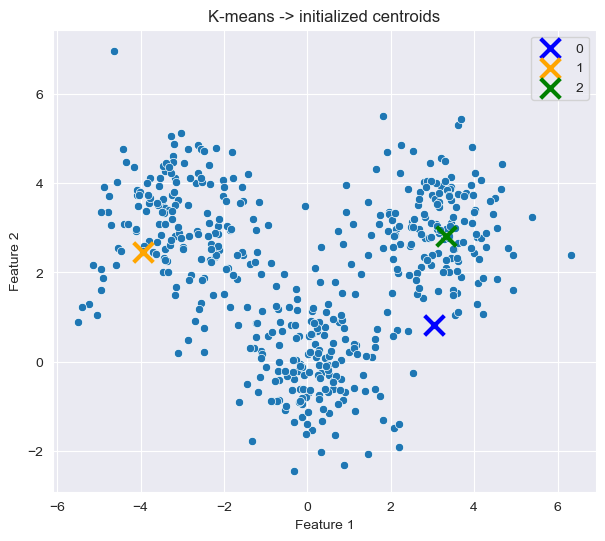

In [222]:
plt.figure(figsize=(7,6))
sns.scatterplot(blobs_df, x = 'Feature 1', y = 'Feature 2')
for center_ids, center in enumerate(cluster_centers):
    plt.scatter(x=center[0],
                y=center[1],
                c=COLOR_LIST[center_ids],
                s=200,
                linewidths=3,
                marker='x',
               label= center_ids)
plt.title('K-means -> initialized centroids')
plt.legend()

In [223]:
# set max iter and tolerace
MAX_ITER=100
TOLERANCE = 1e-4

curr_iter = 0

while True:
    # distance matrix
    # from each point
    distance_matrix = []

    # list that update
    # new centers
    new_centers = []

    # iterate through the center
    for center in cluster_centers:
        # calculate the distance from each point
        distance_matrix.append(np.linalg.norm(X - center, axis=1))

    distance_np = np.column_stack(distance_matrix)
    # calculate the argmin
    point_cluster = np.argmin(distance_np, axis=1)

    for cluster in cluster_id:
        new_centers.append(X[cluster==point_cluster].mean(axis=0))

    # transform new centes in array
    new_centers = np.array(new_centers)

    if curr_iter >= MAX_ITER:
        break

    center_diff = np.linalg.norm(cluster_centers - new_centers, axis=1)

    # check if center is within tolerance band
    if center_diff.max() < TOLERANCE:
        break
    
    # make new center
    cluster_centers = new_centers

    curr_iter += 1

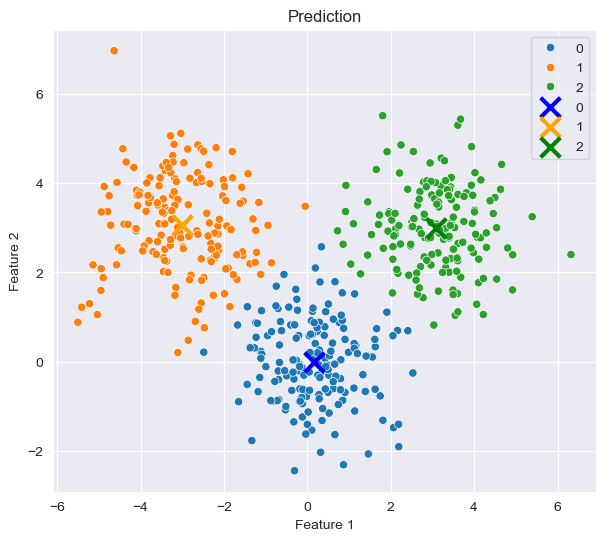

In [224]:
# plot the value
plt.figure(figsize=(7,6))
sns.scatterplot(blobs_df,
                x='Feature 1',
                y='Feature 2',
                hue=point_cluster,
                palette='tab10').set_title('Prediction')

for center_ids, center in enumerate(cluster_centers):
    plt.scatter(x=center[0],
                y=center[1],
                c=COLOR_LIST[center_ids],
                s=200,
                linewidths=3,
                marker='x',
               label= center_ids)
plt.legend()

In [225]:
#initialization inertia to 0
inertia = 0

# Loop goging for data point 
# for each cluster
for clust_id in cluster_id:

    # calculate inertia portion for current cluster
    clust_points = X[point_cluster==clust_id]
    distance_from_center = np.linalg.norm(clust_points - cluster_centers[clust_id], axis=1)

    # increase inertia
    inertia += np.sum(distance_from_center**2)


In [226]:
inertia

925.0024412096225